In [224]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


Цель: применить на практике методы по оценке качества данных.
Описание задания:
В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

In [195]:
data = pd.read_csv('C:/Users/Администратор/Desktop/Netology/Data Science/лекции/5 -/Проблема качества данных/train.csv', sep=',', encoding='utf8') 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

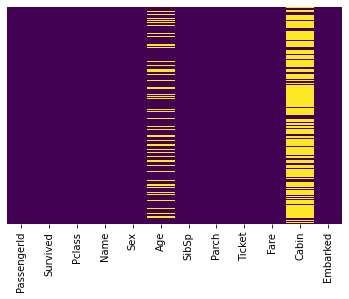

In [107]:
# пропущенные значения
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [190]:

#Пропуски есть в поле Age(20% пропущено) и Cabin (76% пропущено).


In [108]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [188]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [207]:
data = data[data['Age'].notnull()]

In [208]:
#удалили пропущенные значения Age
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [209]:
#отобрали переменные для обучения
X = [ 'Fare', 'Parch', 'Age']
y = ['Survived']

In [210]:
data_ = pd.get_dummies(data[X])

In [211]:
le = LabelEncoder()

In [212]:
y = pd.Series(le.fit_transform(data[y]))
y.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0    0
1    1
2    1
3    1
4    0
dtype: int64

In [213]:
X_train, X_test, y_train, y_test = train_test_split(data_, y, test_size=0.30, 
                                                    random_state=101)

In [214]:
model = make_pipeline(StandardScaler(), LogisticRegression())

In [215]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [216]:
print(classification_report(y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       301
           1       0.67      0.36      0.47       198

    accuracy                           0.68       499
   macro avg       0.67      0.62      0.62       499
weighted avg       0.67      0.68      0.65       499



In [217]:
f1_score(model.predict(X_test), y_test)

0.4233576642335767

Снова загрузите полные данные.
Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
Проверьте данные на наличие пропущенных значений.
a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.
Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

In [284]:
data = pd.read_csv('C:/Users/Администратор/Desktop/Netology/Data Science/лекции/5 -/Проблема качества данных/train.csv', sep=',', encoding='utf8') 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

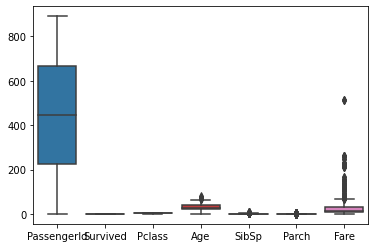

In [285]:
#проверим данные на выбросы
sns.boxplot(data=data)

<AxesSubplot:>

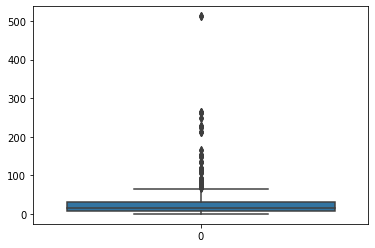

In [286]:
#значительные  выбросы в атрибуте Fare
sns.boxplot(data=data['Fare'])

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

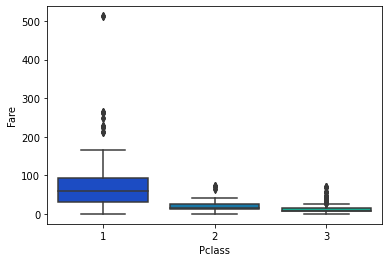

In [287]:
sns.boxplot(x='Pclass',y='Fare',data=data,palette='winter')

In [288]:
# Заменим выбросы по столбцу Fare (оплата).  Используем зависимость оплаты от Класса 
# Если класс 1 и стоиомсть выше 200, то заменяем на медианное значение класса 70,
# если класс 2 и оплата больше 50 - то заменим на медианное значение класса равное 25,
# если класс 3, то заменим на медианное знаение класса, равное 2

def fill_fare(row):

    if row['Pclass']  == 1 and row['Fare']>200:
        return 70

    elif row['Pclass'] == 2 and row['Fare']>50:
        return 25

    elif row['Pclass'] == 3 and row['Fare']>45:
        return 22

    else:
        return row['Fare']

In [289]:
data['Fare'] = data[['Fare','Pclass']].apply(fill_fare,axis=1)

In [290]:
data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

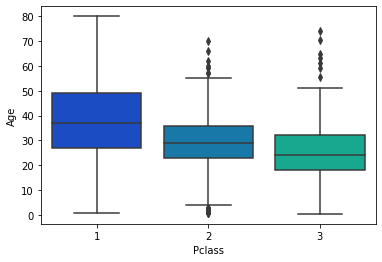

In [291]:
# для заполнения пропусков по возрасту используем зависимость возраста от Класса 
# Классу 1 соответствует медианное значение - 37 лет, 2 классу - 29 лет, 3 классу - 24 года
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [292]:
def fillna_age(row):
    
    if pd.isnull(row['Age']):

        if row['Pclass']  == 1:
            return 37

        elif row['Pclass'] == 2:
            return 29

        else:
            return 24

    else:
        return row['Age']

In [293]:
# заполнили пропущенные значения возраста медианными значениями, соответствующими классам
data['Age'] = data[['Age','Pclass']].apply(fillna_age,axis=1)

<AxesSubplot:>

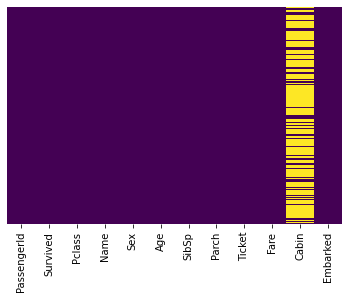

In [294]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [310]:
# можно не использовать переменную Cabin в связи с тем, что в ней пропущено 76% значений 

In [296]:
# выбираем самые значимые фичи для обучения
X = ['Sex', 'Pclass',  'Fare', 'Embarked', 'Parch', 'Age']
y = ['Survived']

In [297]:
data_ = pd.get_dummies(data[X])

In [298]:
data_.head()

,Pclass,Fare,Parch,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,7.2500,0,22.0,0,1,0,0,1
1,1,71.2833,0,38.0,1,0,1,0,0
2,3,7.9250,0,26.0,1,0,0,0,1
3,1,53.1000,0,35.0,1,0,0,0,1
4,3,8.0500,0,35.0,0,1,0,0,1


In [299]:
le = LabelEncoder()

In [300]:
y = pd.Series(le.fit_transform(data[y]))
y.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0    0
1    1
2    1
3    1
4    0
dtype: int64

In [301]:
X_train, X_test, y_train, y_test = train_test_split(data_, y, test_size=0.30, 
                                                    random_state=101)

In [302]:
model = make_pipeline(StandardScaler(), LogisticRegression())

In [303]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [304]:
predictions = model.predict(X_train)

In [305]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [306]:
f1_score(model.predict(X_test), y_test)

0.7246376811594202

In [307]:
f1_score(model.predict(X_train), y_train)

0.7239819004524887

In [308]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.81      0.66      0.72       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



In [309]:
print(classification_report(y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       395
           1       0.75      0.70      0.72       228

    accuracy                           0.80       623
   macro avg       0.79      0.78      0.79       623
weighted avg       0.80      0.80      0.80       623



In [ ]:
в первом случае метрика F1 равна 0.42, Во втором - 0.72, что говорит о том, что вторая модель (в который пропуски и выбросы были заменены) работает лучше.